# Residential Real Estate vs Supply, Inflation, and Interest Rate

## Description ##
Our goal is to determine how the value of residential real estate relates to supply, inflation, and interest rate.  Additionally, we will compare real estate returns to the returns of the  S&P 500 and XLRE (Real Estate Select Sector).

## Objectives ##
We intend to identify ideal periods to transact residential real estate based on valuation, inflation, and interest rate.

In [106]:
# Imports
import pandas as pd
import os
from dotenv import load_dotenv
from fredapi import Fred
import hvplot.pandas
import yfinance as yf
import numpy as np
import seaborn as sns



In [56]:
# Load Environment Variables
load_dotenv()

# setup fred api client
FRED_API_KEY = os.getenv('FRED_API_KEY')
fred = Fred(api_key=FRED_API_KEY)

## Load all Fred Data

In [57]:
dataframes = {}
FRED_SERIES_KEYS = ["FPCPITOTLZGUSA", "FEDFUNDS", "MSACSR", "USSTHPI"]
for FRED_SERIES_KEY in FRED_SERIES_KEYS:
    series = fred.get_series(FRED_SERIES_KEY)
    frame = {
        "date": series.keys(),
        "value": series.values,
    }
    dataframes[FRED_SERIES_KEY] = pd.DataFrame(frame).set_index("date")
    dataframes[FRED_SERIES_KEY][f"pct_change {FRED_SERIES_KEY}"] = dataframes[FRED_SERIES_KEY].pct_change()
    dataframes[FRED_SERIES_KEY][f"diff {FRED_SERIES_KEY}"] = dataframes[FRED_SERIES_KEY]["value"].diff()
    dataframes[FRED_SERIES_KEY] = dataframes[FRED_SERIES_KEY].dropna()


## Residential Real Estate Value vs Inflation

In [58]:
# Plot Inflation, consumer prices for the United States
display(dataframes["FPCPITOTLZGUSA"]["value"].hvplot(title="Inflation, consumer prices for the United States"))

# Plot House price Index for the United States
display(dataframes["USSTHPI"]["value"].hvplot(title="All Transactions House Price Index for the United States"))

:Curve   [date]   (value)

:Curve   [date]   (value)

In [59]:
# Rename Columns to 'Inflation in %', Inflation pct_change'
dataframes["FPCPITOTLZGUSA"].columns = ['Inflation','Inflation pct_change','Difference in Inflation'] 
display(dataframes["FPCPITOTLZGUSA"].head())

# Rename Columns to 'House Price Index', HPI pct_change'
dataframes["USSTHPI"].columns = ['HPI','HPI pct_change','Difference in HPI']
dataframes["USSTHPI"].head()

,Inflation,Inflation pct_change,Difference in Inflation
date,,,
1961-01-01,1.070724,-0.265609,-0.387252
1962-01-01,1.198773,0.119591,0.128049
1963-01-01,1.239669,0.034115,0.040896
1964-01-01,1.278912,0.031655,0.039242
1965-01-01,1.585169,0.239467,0.306258


,HPI,HPI pct_change,Difference in HPI
date,,,
1975-04-01,60.76,0.014188,0.85
1975-07-01,61.16,0.006583,0.40
1975-10-01,62.22,0.017332,1.06
1976-01-01,62.85,0.010125,0.63
1976-04-01,65.43,0.041050,2.58


#### Combine Infaltion and Housing Price Index for the United States

In [60]:
# Use 'concat' function to combine the two DataFrames by matching indexes.
inflation_combined_df = pd.concat([dataframes["FPCPITOTLZGUSA"], dataframes["USSTHPI"]],axis="columns", join="inner")
inflation_combined_df.head()

,Inflation,Inflation pct_change,Difference in Inflation,HPI,HPI pct_change,Difference in HPI
date,,,,,,
1976-01-01,5.744813,-0.371681,-3.398334,62.85,0.010125,0.63
1977-01-01,6.501684,0.131749,0.756871,69.47,0.033934,2.28
1978-01-01,7.630964,0.173690,1.129280,79.59,0.031894,2.46
1979-01-01,11.254471,0.474843,3.623507,91.40,0.044691,3.91
1980-01-01,13.549202,0.203895,2.294731,100.00,0.017605,1.73


In [61]:
# Drop columns 'Inflation''Inflation pct_change','HPI and 'House Price Index'
inflation_combined_df = inflation_combined_df.drop(columns=["Inflation","Inflation pct_change","HPI","HPI pct_change"])
inflation_combined_df.head()

,Difference in Inflation,Difference in HPI
date,,
1976-01-01,-3.398334,0.63
1977-01-01,0.756871,2.28
1978-01-01,1.129280,2.46
1979-01-01,3.623507,3.91
1980-01-01,2.294731,1.73


#### Conduct House Price Index and Inflation Analysis

In [62]:
# Plot difference for combined dataframes
inflation_combined_df.hvplot(title="Housing Price Index, Inflation for the United States",xlabel="Date", ylabel="Difference")

:NdOverlay   [Variable]
   :Curve   [date]   (value)

## Residential Real Estate Value vs Federal Funds Effective Rate

In [63]:
# Federal Effective Rate(Interest Rate)
display(dataframes["FEDFUNDS"]["value"].hvplot(title="Federal Effective Rate"))

# House price Index for the United States
display(dataframes["USSTHPI"]["HPI"].hvplot(title="All Transactions House Price Index for the United States"))

:Curve   [date]   (value)

:Curve   [date]   (HPI)

In [64]:
# Rename columns to 'Interest Rate','Interest Rate pct_change','Difference in Interest Rate'
dataframes["FEDFUNDS"].columns=["Interest Rate","Interest Rate pct_change","Difference in Interest Rate"]
display(dataframes["FEDFUNDS"].head())

# Rename Columns to 'House Price Index', HPI pct_change'
dataframes["USSTHPI"].columns = ['HPI','HPI pct_change','Difference in HPI']
display(dataframes["USSTHPI"].head())

,Interest Rate,Interest Rate pct_change,Difference in Interest Rate
date,,,
1954-08-01,1.22,0.525000,0.42
1954-09-01,1.07,-0.122951,-0.15
1954-10-01,0.85,-0.205607,-0.22
1954-11-01,0.83,-0.023529,-0.02
1954-12-01,1.28,0.542169,0.45


,HPI,HPI pct_change,Difference in HPI
date,,,
1975-04-01,60.76,0.014188,0.85
1975-07-01,61.16,0.006583,0.40
1975-10-01,62.22,0.017332,1.06
1976-01-01,62.85,0.010125,0.63
1976-04-01,65.43,0.041050,2.58


#### Combine Interest Rate and Housing Price Index for the United States

In [65]:
# Use 'concat' function to combine the two DataFrames by matching indexes
fed_rate_combined_df = pd.concat([dataframes["FEDFUNDS"],dataframes["USSTHPI"]],axis="columns",join="inner")
fed_rate_combined_df.head()

,Interest Rate,Interest Rate pct_change,Difference in Interest Rate,HPI,HPI pct_change,Difference in HPI
date,,,,,,
1975-04-01,5.49,-0.009025,-0.05,60.76,0.014188,0.85
1975-07-01,6.10,0.099099,0.55,61.16,0.006583,0.40
1975-10-01,5.82,-0.067308,-0.42,62.22,0.017332,1.06
1976-01-01,4.87,-0.063462,-0.33,62.85,0.010125,0.63
1976-04-01,4.82,-0.004132,-0.02,65.43,0.041050,2.58


In [66]:
# Drop Columns 'Interest Rate','Interest Rate pct_change','HPI','HPI pct_change'
fed_rate_combined_df = fed_rate_combined_df.drop(columns=["Difference in Interest Rate","Interest Rate pct_change","HPI","HPI pct_change"])
fed_rate_combined_df.head()

,Interest Rate,Difference in HPI
date,,
1975-04-01,5.49,0.85
1975-07-01,6.10,0.40
1975-10-01,5.82,1.06
1976-01-01,4.87,0.63
1976-04-01,4.82,2.58


#### Conduct House Price Index and Interest Rate Analysis

In [67]:
# Plot difference for combined dataframes
fed_rate_combined_df.hvplot(title="House Price Index and Fedral Interest Rate", xlabel="Date",ylabel="Difference")

:NdOverlay   [Variable]
   :Curve   [date]   (value)

## Residential Real Estate Value vs Monthly Supply of New Houses

In [68]:
# Plot Monthly Supply of New Houses in the United States
display(dataframes["MSACSR"]["value"].hvplot(title="Monthly Supply of New Houses in the United States"))

# Plot House price Index for the United States
display(dataframes["USSTHPI"]["HPI"].hvplot(title="All Transactions House Price Index for the United States"))

:Curve   [date]   (value)

:Curve   [date]   (HPI)

In [69]:
# Rename Columns to 'Monthly Supply', 'MS pct_change','Difference in MS'
dataframes["MSACSR"].columns=["Monthly Supply","MS pct_change","Difference in MS"]
display(dataframes["MSACSR"].head())

# Rename Columns to 'House Price Index', HPI pct_change'
dataframes["USSTHPI"].columns = ['HPI','HPI pct_change','Difference in HPI']
dataframes["USSTHPI"].head()

,Monthly Supply,MS pct_change,Difference in MS
date,,,
1963-02-01,6.6,0.404255,1.9
1963-03-01,6.4,-0.030303,-0.2
1963-04-01,5.3,-0.171875,-1.1
1963-05-01,5.1,-0.037736,-0.2
1963-06-01,6.0,0.176471,0.9


,HPI,HPI pct_change,Difference in HPI
date,,,
1975-04-01,60.76,0.014188,0.85
1975-07-01,61.16,0.006583,0.40
1975-10-01,62.22,0.017332,1.06
1976-01-01,62.85,0.010125,0.63
1976-04-01,65.43,0.041050,2.58


#### Combine Monthly Suppky of New Houses and Housing Price Index for the United States

In [70]:
# Use 'concat' function to combine the two DataFrames by matching indexes
monthly_supply_df = pd.concat([dataframes["MSACSR"],dataframes["USSTHPI"]],axis="columns",join="inner")
monthly_supply_df.head()

,Monthly Supply,MS pct_change,Difference in MS,HPI,HPI pct_change,Difference in HPI
date,,,,,,
1975-04-01,7.2,-0.191011,-1.7,60.76,0.014188,0.85
1975-07-01,7.0,-0.027778,-0.2,61.16,0.006583,0.40
1975-10-01,6.6,-0.095890,-0.7,62.22,0.017332,1.06
1976-01-01,6.4,0.103448,0.6,62.85,0.010125,0.63
1976-04-01,6.4,-0.058824,-0.4,65.43,0.041050,2.58


In [71]:
# Drop columns 'Monthly Supply','MS pct_change','HPI','HPI pct_change'
monthly_supply_df = monthly_supply_df.drop(columns=["Difference in MS","MS pct_change","HPI","HPI pct_change"])
monthly_supply_df.head()

,Monthly Supply,Difference in HPI
date,,
1975-04-01,7.2,0.85
1975-07-01,7.0,0.40
1975-10-01,6.6,1.06
1976-01-01,6.4,0.63
1976-04-01,6.4,2.58


#### Conduct House Price Index and Monthly Supply of New Houses Analysis

In [72]:
# Plot difference for combined dataframes
monthly_supply_df.hvplot(title="House Price Inde and Monthly Supply of New Houses in the United States", xlabel="Date(in Months)",ylabel="Difference")

:NdOverlay   [Variable]
   :Curve   [date]   (value)

## Residential Real Estate vs S&P500

In [73]:
# Download the S&P500 Dataframe from the yfinance library in quarters since HPI is a quarterly report 

sp500_df = yf.download("^GSPC", interval="3mo", start="1975-01-01", end="2023-10-01")

# Get Closing cloumns and then calculate the returns and drop NaN Values

sp500_close = sp500_df['Close']


sp500_returns = sp500_close.pct_change().dropna()



[*********************100%%**********************]  1 of 1 completed


In [74]:
#  Save a Plot in variable containing the Monthly Returns

sp500_plot = sp500_returns.hvplot(
    title='Quarterly Returns of the S&P 500 Index',
    rot=90,
    label='Quarterly Returns of the S&P 500 Index',
    ylabel='Rate of Return',
    xlabel='Date(in Qtrs.)'

)

sp500_plot

:Curve   [Date]   (Close)

In [75]:
# Get Residential Housing Price Index Data (HPI)
hpi_df = dataframes['USSTHPI']


# Calculate HPI Returns 
hpi_returns = hpi_df['HPI pct_change']


In [76]:
#  Save a Plot in variable containing the Returns and plot ## HPI is a quarterly report

hpi_plot = hpi_returns.hvplot(
    title='Quarterly Returns of the Housing Price Index',
    rot=90,
    label='Quarterly Returns of the Housing Price Index',
    ylabel='Rate of Return',
    xlabel='Date(in Qtrs.)'

)

hpi_plot

:Curve   [date]   (HPI pct_change)

In [77]:
# Slice the HPI returns data to start from 1985 for comparison, since yfinace library only lets us pull SP500 data fromn 1985
hpi_1985_returns = hpi_returns.iloc[40:]



In [78]:
# Save a Plot in variable containing the Returns

hpi_1985_plot = hpi_1985_returns.hvplot(
    title='Quarterly Returns of the Housing Price Index',
    rot=90,
    label='Quarterly Returns of the Housing Price Index',
    ylabel='Rate of Return',
    xlabel='Date(in Qtrs.)'

)

In [79]:
# Create an overlay plot for the two visualizations of SP550 & HPI
(sp500_plot * hpi_1985_plot).opts(
    title="Comparative view at Quartlely Returns of the HPI with Monthly Returns of the S&P500",
    bgcolor="lightgrey", 
    height=500,
    width=1000,
    ylabel='Rate of Return',
    xlabel='Date',
    #hover_line_color='yellow'
)

:Overlay
   .Curve.Quarterly_Returns_of_the_S_ampersand_P_500_Index :Curve   [Date]   (Close)
   .Curve.Quarterly_Returns_of_the_Housing_Price_Index     :Curve   [date]   (HPI pct_change)

## Residential Real Estate vs XLRE

In [80]:
# Download the XLRE Fund Dataframe from the yfinance library on a 3 month interval to compare with HPI quarterly report

xlre_download = yf.download("XLRE", interval="3mo", start="1985-01-01", end="2023-10-01")

# Get Closing cloumns and then calculate the returns and drop NaN Values

xlre_close = xlre_download['Close']


xlre_returns = xlre_close.pct_change().dropna()


[*********************100%%**********************]  1 of 1 completed


In [81]:
#  Store a Plot inside a variable 

xlre_plot = xlre_returns.hvplot(
    title='Quarterly Returns of The Real Estate Select Sector SPDR Fund (XLRE)',
    rot=90,
    ylabel='Rate of Return',
    xlabel='Date(in Qtrs.)'

)

xlre_plot

:Curve   [Date]   (Close)

In [82]:
# Slice HPI data to start from 2016 for a comparative view of XLRE & create a variable to store a plot of HPI for this timeframe 
hpi_returns_2016 = hpi_1985_returns.loc['2016-01-01':'2023-07-01']

hpi_2016_plot = hpi_returns_2016.hvplot(
    title='Quarterly Returns of the Housing Price Index',
    rot=90,
    label='Quarterly Returns of the Housing Price Index',
    ylabel='Rate of Return',
    xlabel='Date(in Qtrs.)'

)

In [83]:
# Create an overlay plot for the two visualizations of XLRE & HPI
(xlre_plot * hpi_2016_plot).opts(
    title="Comparative view at Quartlely Returns of the HPI, S&P500 & XLRE",
    bgcolor="lightgrey", 
    height=500,
    width=1000,
    ylabel='Rate of Return',
    xlabel='Date',
    #hover_cols=['yellow']
)

:Overlay
   .Curve.Close                                        :Curve   [Date]   (Close)
   .Curve.Quarterly_Returns_of_the_Housing_Price_Index :Curve   [date]   (HPI pct_change)

## Residential Real Estate vs XLRE vs SP500 Index

In [84]:
# Slice SP500 data to start from 2016 for a comparative view of XLRE & create a variable to store a plot of SP500 for this timeframe 
sp500_qtr_returns_2016 = sp500_returns.loc['2016-01-01':'2023-07-01']

sp500_2016_plot = sp500_qtr_returns_2016.hvplot(
    title='Quarterly Returns of the S&P 500 Index',
    rot=90,
    label='Quarterly Returns of the S&P 500 Index',
    ylabel='Rate of Return',
    xlabel='Date(in Qtrs.)'

)

In [85]:
# Create an overlay plot for the two visualizations of SP550 & HPI
(sp500_2016_plot * hpi_2016_plot * xlre_plot).opts(
    title="Comparative view at Quartlely Returns of the HPI, S&P500 & XLRE",
    bgcolor="lightgrey", 
    height=500,
    width=1000,
    ylabel='Rate of Return',
    xlabel='Date',
    #hover_cols=['yellow']
)

:Overlay
   .Curve.Quarterly_Returns_of_the_S_ampersand_P_500_Index :Curve   [Date]   (Close)
   .Curve.Quarterly_Returns_of_the_Housing_Price_Index     :Curve   [date]   (HPI pct_change)
   .Curve.Close                                            :Curve   [Date]   (Close)

## Investment Analysis of HPI, SP500 & XLRE

### Calculate and Plot the Standard Deviation and Sharpe Ratios

In [86]:
# Fetch 13Week Treasury Bill for a Risk Free Rate

tbill_month = yf.download("^IRX", interval="1mo", start="1985-01-01", end="2023-10-01")


tbill_qtr = yf.download("^IRX", interval="1mo", start="1985-01-01", end="2023-10-01")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [97]:
# Concat return DataFrames with inner join
all_returns = pd.concat([sp500_qtr_returns_2016,hpi_returns_2016,xlre_returns], axis='columns', join='inner')

all_returns =  all_returns.rename(columns={
    "Close": "SP500 Returns",
    "HPI pct_change": "HPI Returns",
    "Close": "XLRE Returns"
})

all_returns.head()

,XLRE Returns,HPI Returns,XLRE Returns
2016-01-01,0.007730,0.009253,0.031298
2016-04-01,0.018993,0.018691,0.044465
2016-07-01,0.033070,0.017813,-0.024412
2016-10-01,0.032542,0.007816,-0.061642
2017-01-01,0.055337,0.007233,0.027642


In [102]:
# Calculate Standard Deviation and Sharpe Ratios
all_portfolio_std = all_returns.std()

# Calculate sharpe ratio
sharpe_ratios = (all_returns.mean() * 252) / (all_portfolio_std * np.sqrt(252))

display(all_portfolio_std)
display(sharpe_ratios)


XLRE Returns    0.084611
HPI Returns     0.016435
XLRE Returns    0.082305
dtype: float64

XLRE Returns     5.603851
HPI Returns     18.807140
XLRE Returns     1.865732
dtype: float64

<Axes: >

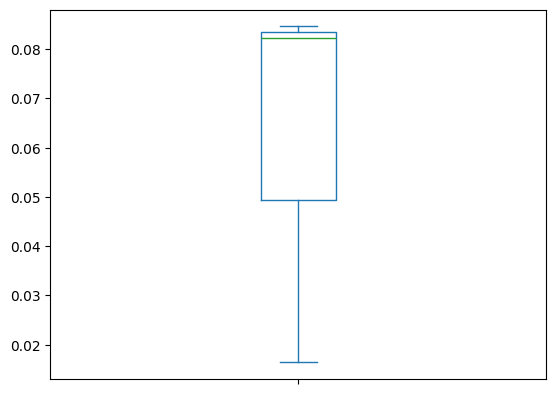

In [109]:
all_portfolio_std.plot.box()

<Axes: title={'center': 'Sharpe Ratios'}>

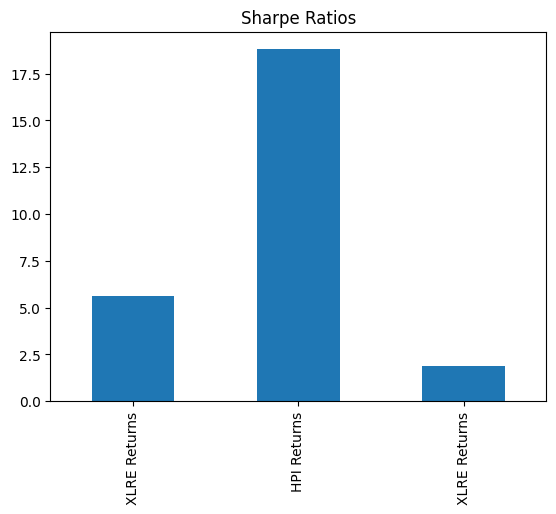

In [110]:
# Plot Sharpe Ratios
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Calculate and Plot Correlation

In [103]:
# Calculate Correlation

investment_correlation = all_returns.corr()

<Axes: >

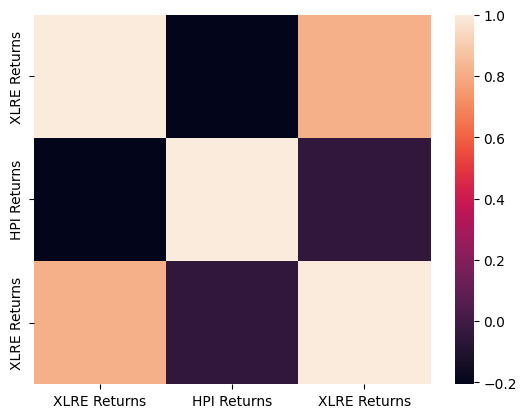

In [108]:
# Plot Correlation Results
sns.heatmap(investment_correlation)